In [1]:
#GROUP NO 6 : 
#PC 34 - Siddhant Deshpande
#PC 35 - Shriya Padhi
#PC 36 - Arnav Sinha
#PC 37 - Atharv Ganla

In [1]:
import pandas as pd #data processing
import numpy as np #calculate stuff
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization

In [2]:
pokemon_df = pd.read_csv("pokemon.csv")
combats_df = pd.read_csv("combats.csv")
test_df = pd.read_csv("tests.csv")
prediction_df = test_df.copy()


In [3]:
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
test_df.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


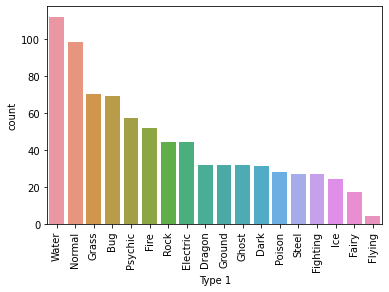

In [6]:
#Visualizing based on Types
sns.countplot(x="Type 1",data=pokemon_df, 
              order=pokemon_df["Type 1"].value_counts().index)

plt.xticks(rotation=90)
plt.show()

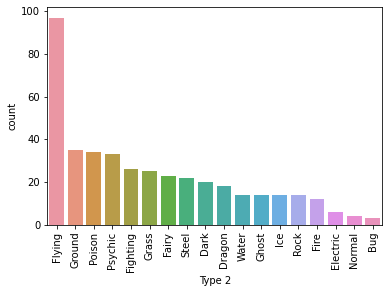

In [7]:
sns.countplot(x='Type 2', data=pokemon_df, order=pokemon_df['Type 2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [8]:
#Exploring Pokemon stats
pokemon_df['Total_stats'] = pokemon_df['HP'] + pokemon_df['Attack'] + pokemon_df['Defense'] + pokemon_df['Sp. Atk'] + pokemon_df['Sp. Def'] + pokemon_df['Speed']
pokemon_df.iloc[:,[1,-1]].head()

,Name,Total_stats
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,525
3,Mega Venusaur,625
4,Charmander,309


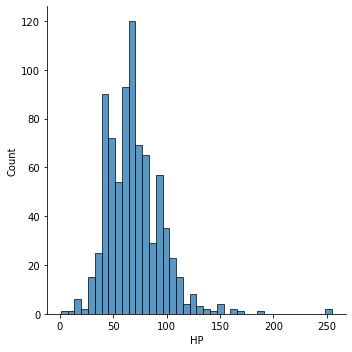

In [9]:
sns.displot(pokemon_df['HP'])

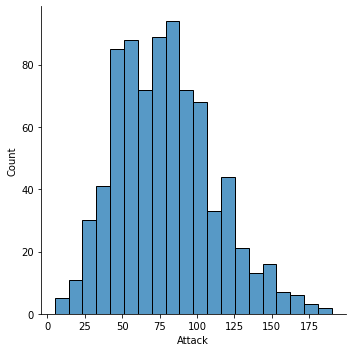

In [10]:
sns.displot(pokemon_df['Attack'])

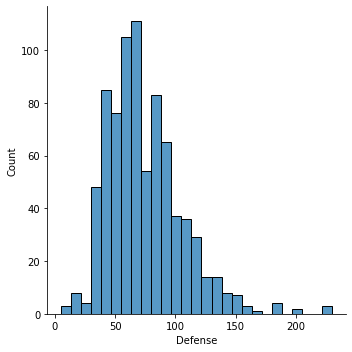

In [11]:
sns.displot(pokemon_df['Defense'])

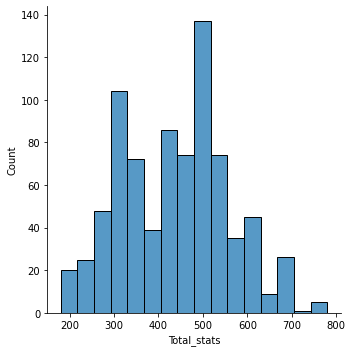

In [12]:
sns.displot(pokemon_df.Total_stats)

In [13]:
pokemon_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total_stats
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,435.10250
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,119.96304
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,180.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,330.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,450.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,515.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,780.00000


In [14]:
#Seeing the strongest and weakest pokemon
#Weakest
sorted_pokemon_df = pokemon_df.sort_values(by="Total_stats")
sorted_pokemon_df[["Name","Total_stats"]].head()

,Name,Total_stats
206,Sunkern,180
322,Azurill,190
446,Kricketot,194
288,Wurmple,195
16,Weedle,195


In [15]:
#Strrongest
sorted_pokemon_df[["Name","Total_stats"]].tail()

,Name,Total_stats
424,Primal Groudon,770
422,Primal Kyogre,770
164,Mega Mewtwo Y,780
426,Mega Rayquaza,780
163,Mega Mewtwo X,780


In [16]:
combats_df[['First_pokemon', 'Second_pokemon', 'Winner']].head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [17]:
#Creating battle dataframe (combats with name)
name_dict = dict(zip(pokemon_df['#'], pokemon_df['Name']))
combats_name_df = combats_df[['First_pokemon', 'Second_pokemon', 'Winner']].replace(name_dict)
combats_name_df.head()


,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


In [18]:
#Data Cleansing
pokemon_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #            800 non-null    int64 
 1   Name         799 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       414 non-null    object
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Atk      800 non-null    int64 
 8   Sp. Def      800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
 12  Total_stats  800 non-null    int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


###### Null values in Type 2 because not all pokemon have two types

In [19]:

pokemon_df['Type 2'] = pokemon_df['Type 2'].fillna('None')
pokemon_df['Name'] = pokemon_df['Name'].fillna('Primeape')

#some type is named 'Fight', and some named 'Fighting'. This code is to clean it up.
pokemon_df['Type 1'] = pokemon_df['Type 1'].replace('Fighting', 'Fight')
pokemon_df['Type 2'] = pokemon_df['Type 2'].replace('Fighting', 'Fight')

#changing true/false to 1/0 in Legendary column
pokemon_df['Legendary'] = pokemon_df['Legendary'].map({False: 0, True:1})

In [20]:
#creating dictionaries
type_df = pokemon_df.iloc[:, 0:4]
type_df = type_df.drop('Name', axis=1)
stats_df = pokemon_df.drop(['Type 1', 'Type 2', 'Name', 'Generation', 'Total_stats'], axis=1)

type_dict = type_df.set_index('#').T.to_dict('list')
stats_dict = stats_df.set_index('#').T.to_dict('list')

In [21]:
#changing winner to 0 and 1, each corresponds to first and second pokemon respectively
combats_df.Winner[combats_df.Winner == combats_df.First_pokemon] = 0
combats_df.Winner[combats_df.Winner == combats_df.Second_pokemon] = 1

combats_df.head(5)

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [22]:
def replace_things(data):
    #map each battles to pokemon data
    
    data['First_pokemon_stats'] = data.First_pokemon.map(stats_dict)
    data['Second_pokemon_stats'] = data.Second_pokemon.map(stats_dict)

    data['First_pokemon'] = data.First_pokemon.map(type_dict)
    data['Second_pokemon'] = data.Second_pokemon.map(type_dict)

    return data

In [23]:
def calculate_stats(data):
    #calculate stats difference
    
    stats_col = ['HP_diff', 'Attack_diff', 'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff', 'Legendary_diff']
    diff_list = []

    for row in data.itertuples():
        diff_list.append(np.array(row.First_pokemon_stats) - np.array(row.Second_pokemon_stats))

    stats_df = pd.DataFrame(diff_list, columns=stats_col)
    data = pd.concat([data, stats_df], axis=1)
    data.drop(['First_pokemon_stats', 'Second_pokemon_stats'], axis=1, inplace=True)

    return data

In [24]:
def calculate_effectiveness(data):

    '''
        this function creates a new column of each pokemon's effectiveness against it's enemy.
        every effectiveness starts with 1, if an effective type is found on enemy's type, effectiveness * 2
        if not very effective is found on enemy's type, effectiveness / 2
        if not effective is found on enemy's type, effectiveness * 0
        
        This function creates 4 new columns
            1. P1_type1, pokemon 1 first type effectiveness against the enemy's type
            2. P1_type2, pokemon 1 second type effectiveness against the enemy's type
            3. P2_type1, pokemon 2 first type effectiveness against the enemy's type
            4. P2_type2, pokemon 2 second type effectiveness against the enemy's type
    '''
    
    very_effective_dict = {'Normal': [],
                           'Fight': ['Normal', 'Rock', 'Steel', 'Ice', 'Dark'],
                           'Flying': ['Fight', 'Bug', 'Grass'],
                           'Poison': ['Grass', 'Fairy'],
                           'Ground': ['Poison', 'Rock', 'Steel', 'Fire', 'Electric'],
                           'Rock': ['Flying', 'Bug', 'Fire', 'Ice'],
                           'Bug': ['Grass', 'Psychic', 'Dark'],
                           'Ghost': ['Ghost', 'Psychic'],
                           'Steel': ['Rock', 'Ice', 'Fairy'],
                           'Fire': ['Bug', 'Steel', 'Grass', 'Ice'],
                           'Water': ['Ground', 'Rock', 'Fire'],
                           'Grass': ['Ground', 'Rock', 'Water'],
                           'Electric': ['Flying', 'Water'],
                           'Psychic': ['Fight', 'Poison'],
                           'Ice': ['Flying', 'Ground', 'Grass', 'Dragon'],
                           'Dragon': ['Dragon'],
                           'Dark': ['Ghost', 'Psychic'],
                           'Fairy': ['Fight', 'Dragon', 'Dark'],
                           'None': []}

    not_very_effective_dict = {'Normal': ['Rock', 'Steel'],
                               'Fight': ['Flying', 'Poison', 'Bug', 'Psychic', 'Fairy'],
                               'Flying': ['Rock', 'Steel', 'Electric'],
                               'Poison': ['Poison', 'Rock', 'Ground', 'Ghost'],
                               'Ground': ['Bug', 'Grass'],
                               'Rock': ['Fight', 'Ground', 'Steel'],
                               'Bug': ['Fight', 'Flying', 'Poison', 'Ghost', 'Steel', 'Fire', 'Fairy'],
                               'Ghost': ['Dark'],
                               'Steel': ['Steel', 'Fire', 'Water', 'Electric'],
                               'Fire': ['Rock', 'Fire', 'Water', 'Dragon'],
                               'Water': ['Water', 'Grass', 'Dragon'],
                               'Grass': ['Flying', 'Poison', 'Bug', 'Steel', 'Fire', 'Grass', 'Dragon'],
                               'Electric': ['Grass', 'Electric', 'Dragon'],
                               'Psychic': ['Steel', 'Psychic'],
                               'Ice': ['Steel', 'Fire', 'Water', 'Psychic'],
                               'Dragon': ['Steel'],
                               'Dark': ['Fight', 'Dark', 'Fairy'],
                               'Fairy': ['Posion', 'Steel', 'Fire'],
                               'None': []}

    not_effective_dict = {'Normal': ['Ghost'],
                          'Fight': ['Ghost'],
                          'Flying': [],
                          'Poison': ['Steel'],
                          'Ground': ['Flying'],
                          'Rock': [],
                          'Bug': [],
                          'Ghost': ['Normal'],
                          'Steel': [],
                          'Fire': [],
                          'Water': [],
                          'Grass': [],
                          'Electric': ['Ground'],
                          'Psychic': ['Dark'],
                          'Ice': [],
                          'Dragon': ['Fairy'],
                          'Dark': [],
                          'Fairy': [],
                          'None': []}

    p1_type1_list = []
    p1_type2_list = []
    p2_type1_list = []
    p2_type2_list = []

    for row in data.itertuples():
        nested_type = [[1, 1], [1, 1]]

        #manipulating values if found on dictionary
        for i in range(0,2):
            for j in range(0,2):
                if row.Second_pokemon[j] in very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 2
                if row.Second_pokemon[j] in not_very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] /= 2
                if row.Second_pokemon[j] in not_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 0

                if row.First_pokemon[j] in very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 2
                if row.First_pokemon[j] in not_very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] /= 2
                if row.First_pokemon[j] in not_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 0

        p1_type1_list.append(nested_type[0][0])
        p1_type2_list.append(nested_type[0][1])
        p2_type1_list.append(nested_type[1][0])
        p2_type2_list.append(nested_type[1][1])

    data = data.assign(P1_type1=p1_type1_list, P1_type2=p1_type2_list, P2_type1=p2_type1_list, P2_type2=p2_type2_list)
    data = data.drop(['First_pokemon', 'Second_pokemon'], axis=1)

    return data

In [25]:

#map the battle to pokemon's data

train_df = replace_things(combats_df)

train_df.head(5)

,First_pokemon,Second_pokemon,Winner,First_pokemon_stats,Second_pokemon_stats
0,"[Rock, Ground]","[Grass, Dark]",1,"[50, 64, 50, 45, 50, 41, 0]","[70, 70, 40, 60, 40, 60, 0]"
1,"[Grass, Fight]","[Rock, Fight]",1,"[91, 90, 72, 90, 129, 108, 1]","[91, 129, 90, 72, 90, 108, 1]"
2,"[Fairy, Flying]","[Psychic, None]",1,"[55, 40, 85, 80, 105, 40, 0]","[75, 75, 75, 125, 95, 40, 0]"
3,"[Fire, None]","[Dragon, None]",1,"[40, 40, 40, 70, 40, 20, 0]","[77, 120, 90, 60, 90, 48, 0]"
4,"[Rock, Water]","[Bug, Rock]",0,"[70, 60, 125, 115, 70, 55, 0]","[20, 10, 230, 10, 230, 5, 0]"


###### Each value on the list corresponds to HP, atk, def, sp.atk, sp.def, speed and legendary

In [26]:

#calculate the stats difference

train_df = calculate_stats(train_df)

train_df.head(5)

,First_pokemon,Second_pokemon,Winner,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,Legendary_diff
0,"[Rock, Ground]","[Grass, Dark]",1,-20,-6,10,-15,10,-19,0
1,"[Grass, Fight]","[Rock, Fight]",1,0,-39,-18,18,39,0,0
2,"[Fairy, Flying]","[Psychic, None]",1,-20,-35,10,-45,10,0,0
3,"[Fire, None]","[Dragon, None]",1,-37,-80,-50,10,-50,-28,0
4,"[Rock, Water]","[Bug, Rock]",0,50,50,-105,105,-160,50,0


###### Each first pokemon\'s stats are then subtracted by the second pokemon\'s stats
###### Positive values implies the first pokemon has higher stats and vice versa

In [27]:
#calculate pokemon types' effectiveness

train_df = calculate_effectiveness(train_df)

train_df.head()

,Winner,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,Legendary_diff,P1_type1,P1_type2,P2_type1,P2_type2
0,1,-20,-6,10,-15,10,-19,0,1.0,0.5,4.0,1.0
1,1,0,-39,-18,18,39,0,0,2.0,2.0,0.5,1.0
2,1,-20,-35,10,-45,10,0,0,1.0,1.0,1.0,1.0
3,1,-37,-80,-50,10,-50,-28,0,0.5,1.0,1.0,1.0
4,0,50,50,-105,105,-160,50,0,2.0,2.0,1.0,1.0


In [28]:

y_train_full = train_df['Winner']
x_train_full = train_df.drop("Winner",axis=1)

from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(x_train_full, y_train_full, test_size=0.25, random_state=42)

In [29]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_cv)

from sklearn.metrics import accuracy_score
print("Accuracy for RandomForestClassifier : " , accuracy_score(pred,y_cv))

Accuracy for RandomForestClassifier :  0.96192


In [30]:

from sklearn.tree import DecisionTreeClassifier

dctree = DecisionTreeClassifier()
dctree.fit(x_train,y_train)
pred = dctree.predict(x_cv)

from sklearn.metrics import accuracy_score
print("Accuracy for Decision tree classifier : " , accuracy_score(pred,y_cv))

Accuracy for Decision tree classifier :  0.94216


In [31]:

#Prediction

test_df = replace_things(test_df)
test_df = calculate_stats(test_df)
test_df = calculate_effectiveness(test_df)
test_df.head()

,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,Legendary_diff,P1_type1,P1_type2,P2_type1,P2_type2
0,-10,37,-10,5,5,38,0,1.0,1.0,1.0,1.0
1,-21,9,46,-11,51,-15,0,4.0,0.5,0.5,1.0
2,29,-15,17,110,-30,14,1,1.0,2.0,0.5,1.0
3,-5,-31,-12,-26,-7,-15,0,0.5,1.0,1.0,1.0
4,-125,-15,-50,-9,-14,5,0,1.0,1.0,1.0,1.0


In [32]:
classifier = RandomForestClassifier(n_estimators=100)
model = classifier.fit(x_train_full, y_train_full)
prediction = model.predict(test_df)


In [33]:

prediction_df["Winner"] = prediction
prediction_df['Winner'][prediction_df['Winner'] == 0] = prediction_df['First_pokemon']
prediction_df['Winner'][prediction_df['Winner'] == 1] = prediction_df['Second_pokemon']
prediction_df.head()

,First_pokemon,Second_pokemon,Winner
0,129,117,129
1,660,211,211
2,706,115,706
3,195,618,618
4,27,656,27


In [34]:
prediction_name_df = prediction_df[['First_pokemon', 'Second_pokemon', 'Winner']].replace(name_dict)
prediction_name_df.head()


,First_pokemon,Second_pokemon,Winner
0,Seaking,Lickitung,Seaking
1,Ferrothorn,Quagsire,Quagsire
2,Thundurus Therian Forme,Hitmonlee,Thundurus Therian Forme
3,Flaaffy,Maractus,Maractus
4,Spearow,Alomomola,Spearow


In [35]:
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,625
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,0,309


In [71]:
x = 10
y = 31

In [72]:
names = pokemon_df["Name"].tolist()

name2 = names[x-1]

pokemon_df[pokemon_df.Name == name2]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats
9,10,Squirtle,Water,None,44,48,65,50,64,43,1,0,314


In [73]:
name1 = names[y-1]
pokemon_df[pokemon_df.Name == name1]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats
30,31,Pikachu,Electric,None,35,55,40,50,50,90,1,0,320


In [74]:
test1 = pd.DataFrame({"First_pokemon" : [y] ,"Second_pokemon" : [x]})

In [75]:
test1

,First_pokemon,Second_pokemon
0,31,10


In [76]:
test1 = replace_things(test1)
test1 = calculate_stats(test1)
test1 = calculate_effectiveness(test1)
test1.head()

,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,Legendary_diff,P1_type1,P1_type2,P2_type1,P2_type2
0,-9,7,-25,0,-14,47,0,2,1,1,1


In [77]:
classifier.predict(test1)

array([0], dtype=int64)

In [80]:
result = classifier.predict(test1)
if result[0] == 1 :
    print("The stronger pokemon is " + name2 + )
else :
    print("The stronger pokemon is " +name1)

The stronger pokemon is Pikachu
